In [1]:
from sklearn.datasets import load_digits
mnist = load_digits()
mnist

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [2]:
x, y = mnist["data"], mnist["target"]
x.shape

(1797, 64)

In [3]:
y.shape

(1797,)

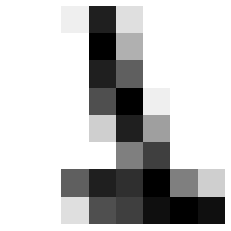

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = x[1000]
some_digit_image =some_digit.reshape(8,8)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [5]:
y[1000]

1

In [21]:
#shuffling the list index
x_train, y_train, x_test, y_test = x[:1797], y[1797:], x[:1797], y[1797:]

import numpy as np
#building a numpy shuffle function
shuffle_index = np.random.permutation(1797)
x_train, y_train = x_train[shuffle_index], y[shuffle_index]
x_test, y_test = x_test[shuffle_index], y[shuffle_index]

In [11]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.9905397885364496

In [13]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, x_train, y_train, cv=10, scoring= "accuracy")

array([0.99444444, 0.98888889, 0.97222222, 1.        , 0.98333333,
       0.99444444, 0.97777778, 0.98324022, 0.98324022, 0.99441341])

In [15]:
from sklearn.model_selection import cross_val_predict
y_prediction = cross_val_predict(model, x_train, y_train, cv=5)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_prediction)

array([[178,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 182,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 176,   0,   0,   0,   0,   1,   0,   0],
       [  0,   0,   0, 180,   0,   0,   0,   2,   1,   0],
       [  0,   0,   0,   0, 179,   0,   0,   1,   1,   0],
       [  0,   0,   0,   0,   0, 180,   1,   0,   0,   1],
       [  0,   0,   0,   0,   0,   0, 180,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0, 178,   0,   1],
       [  0,   5,   0,   2,   0,   0,   0,   0, 167,   0],
       [  0,   1,   0,   2,   1,   2,   0,   0,   2, 172]], dtype=int64)

In [17]:
from sklearn.metrics import precision_score, recall_score
recall = recall_score(y_train, y_prediction, average="macro")

precision = precision_score(y_train, y_prediction, average="macro")

print(recall)
print(precision)

0.9860132321557868
0.9861734505231731


In [18]:
from sklearn.metrics import f1_score
f1 = f1_score(y_train, y_prediction, average="macro")
print(f1)

0.9860272146928807


In [22]:
model.fit(x_test, y_test)
model.score(x_test, y_test)

0.9905397885364496